## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score

## Load Dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preprocessing

### Missing Value

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Duplicated

In [ ]:
df.duplicated().sum()

0

### Outlier Handling

In [ ]:
features  = list(df)[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

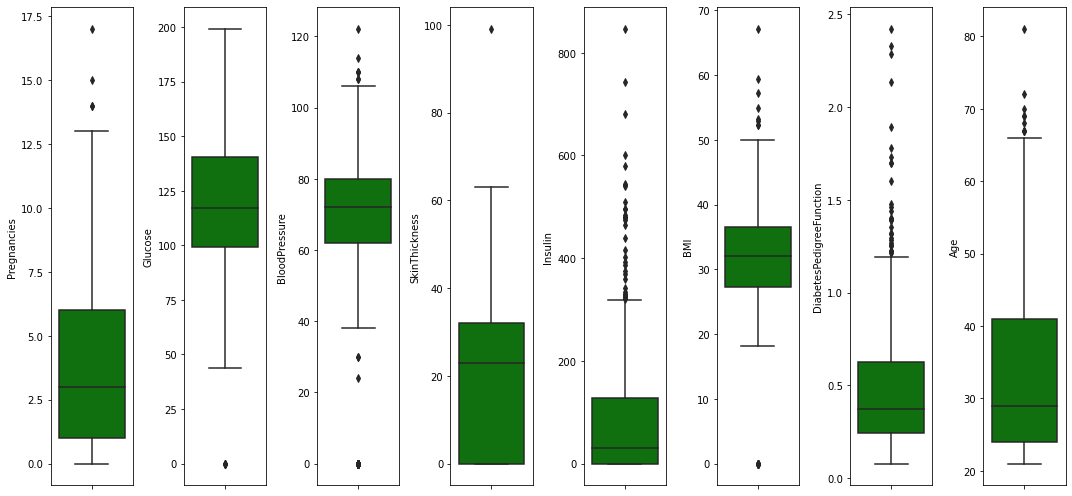

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=features[i],data=df,color='green')
    plt.tight_layout()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
outlier_features =['Pregnancies','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

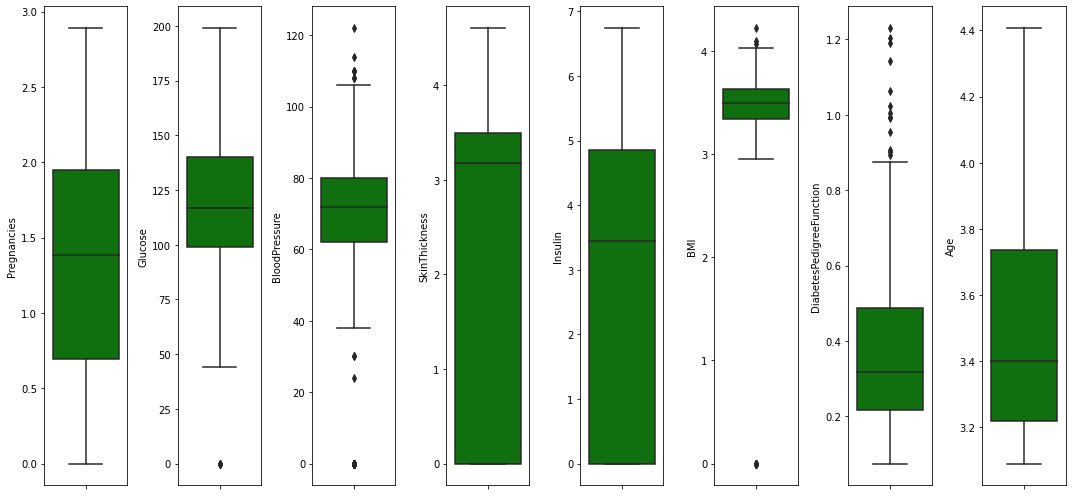

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=features[i],data=df,color='green')
    plt.tight_layout()

### Multicolinearity Handling

<AxesSubplot:>

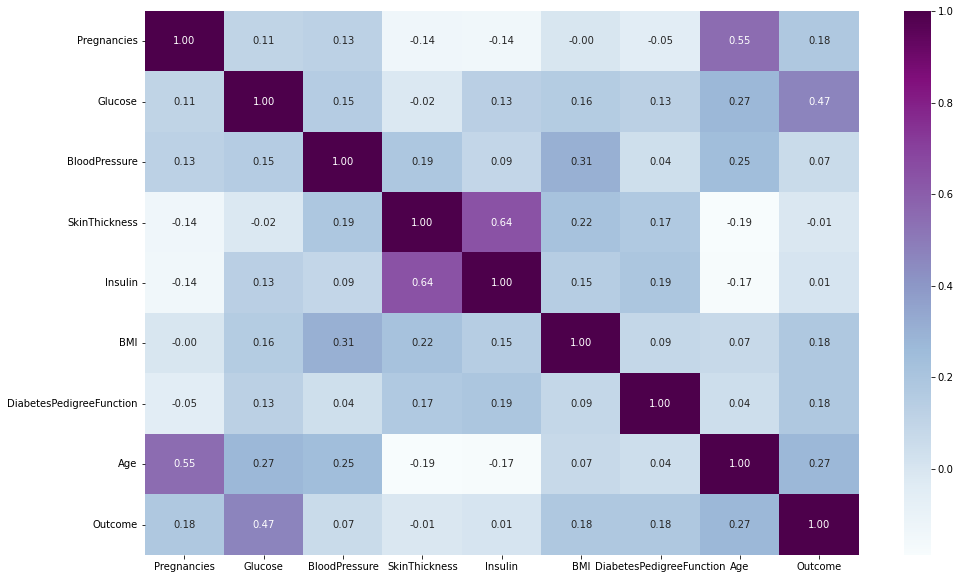

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [ ]:
# df = df.drop('Pregnancies', axis=1)

### Feature + Target

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

## Modeling

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Logreg

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [ ]:
y_pred_knn = knn.predict(X_test)

y_pred_reg = logreg.predict(X_test)

y_pred_dt = dt.predict(X_test)

In [ ]:
print('Akurasi KNN',accuracy_score(y_test, y_pred_knn))

Akurasi KNN 0.683982683982684


In [ ]:
print('Akurasi Logreg',accuracy_score(y_test, y_pred_reg))

Akurasi Logreg 0.7489177489177489


In [ ]:
print('Akurasi Decission Tree',accuracy_score(y_test, y_pred_dt))

Akurasi Decission Tree 0.7056277056277056
